In [112]:
import sympy as sy
from sympy import exp, cosh, sinh
sy.init_printing()

In [113]:
beta, B, C = sy.symbols('beta B C', real=True)
eps, s = sy.symbols('epsilon s', real=True, positive=True)
m, i = sy.symbols('m, i', integer=True, positive=True)
one, two, three = sy.Integer(1), sy.Integer(2), sy.Integer(3)

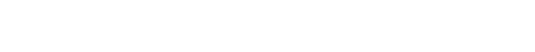

In [114]:
eq1 = (1-eps)/2 * (B * exp(beta) + C * exp(-beta)) - (s + (1-eps)/2) * (B + C)
eq2 = (B * exp((m-2)*beta) + C * exp(-(m-2)*beta)) / 2 - (s + three/2) *  (B * exp((m-1)*beta) + C * exp(-(m-1)*beta))
eq2

In [115]:
subs0 = ((exp(beta) + exp(-beta)) / 2 - 1)
sol = sy.linsolve([eq1.subs(s, subs0), eq2.subs(s, subs0) - 1/s], (B, C))
Bsol, Csol = sol.args[0]


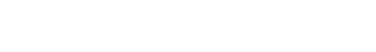

In [119]:
sy.factor(sy.simplify(Bsol))

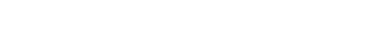

In [117]:
sy.factor(sy.simplify(Csol))

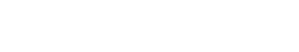

In [125]:
Bcore = sy.factor(Bsol * (exp(beta) + 1))
Ccore = sy.factor(Csol * (exp(beta) + 1))
Bcore

In [126]:
subs1 = (exp(beta*m), cosh(beta*m) + sinh(beta*m))
subs2 = ((cosh(beta*m) + sinh(beta*m))**2,
         (cosh(beta*m) + sinh(beta*m))
         / (cosh(beta*m) - sinh(beta*m)))
subs3 = (exp(beta), cosh(beta) + sinh(beta))
subs4 = ((cosh(beta) + sinh(beta))**2, 
         (cosh(beta) + sinh(beta))
         / (cosh(beta) - sinh(beta)))
Bsimp = sy.collect(sy.simplify(Bcore.subs([subs1, subs2])), [cosh(beta*m), sinh(beta*m)]).subs([subs3, subs4])
Csimp = sy.collect(sy.simplify(Ccore.subs([subs1, subs2])), [cosh(beta*m), sinh(beta*m)]).subs([subs3, subs4])

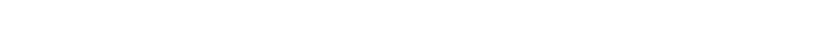

In [128]:
Bfinal = sy.trigsimp(sy.simplify(Bsimp) / (exp(beta) + 1))
Cfinal = sy.trigsimp(sy.simplify(Csimp) / (exp(beta) + 1))
Bfinal, Cfinal

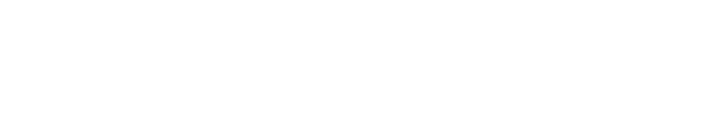

In [132]:
Bser = sy.series(Bfinal.subs(s, subs0), beta, 0, 1)
Bser

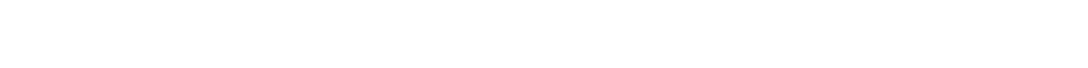

In [136]:
sy.collect(sy.simplify(Bser), beta)

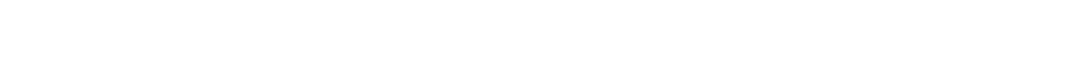

In [137]:
Cser = sy.series(Cfinal.subs(s, subs0), beta, 0, 1)
sy.collect(sy.simplify(Cser), beta)

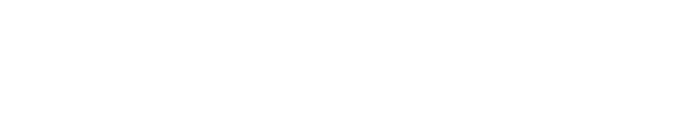

In [143]:
deta = sy.series(1/subs0 + Bser * exp(beta*(i-1)) + Cser * exp(-beta*(i-1)), beta, 0, 1)
deta

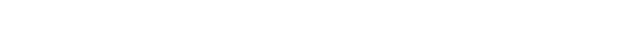

In [ ]:
sy.series(sy.simplify(deta), eps, 1, 6)